# Visualizing the Complete Segmentation

### Importing Data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

non_outliers_df = pd.read_csv('../data/processed/customers_with_segment_labels.csv')
outliers_df = pd.read_csv('../data/processed/customer_metrics_outliers.csv')

In [16]:
non_outliers_df.head()


,Customer ID,TotalSpent,Frequency,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency,Segment,SegmentLabel
0,12346.0,169.36,2,2010-03-02 13:08:00,2010-06-28 13:53:00,118,164,3,Reward
1,12347.0,1323.32,2,2010-10-31 14:20:00,2010-12-07 14:57:00,37,2,0,Retain
2,12348.0,221.16,1,2010-09-27 14:59:00,2010-09-27 14:59:00,1,73,2,Nurture
3,12349.0,2221.14,2,2010-04-29 13:20:00,2010-10-28 08:23:00,181,42,0,Retain
4,12351.0,300.93,1,2010-11-29 15:23:00,2010-11-29 15:23:00,1,10,2,Nurture


In [17]:
outliers_df.head()

,Customer ID,TotalSpent,Frequency,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency,Segment,SegmentLabel
0,12357.0,11229.99,1,2010-11-16 10:05:00,2010-11-16 10:05:00,1,23,-1,Pamper
1,12380.0,4782.84,4,2010-02-15 12:05:00,2010-08-31 14:54:00,197,100,-1,Pamper
2,12409.0,12346.62,4,2010-05-23 15:21:00,2010-10-15 10:24:00,144,55,-1,Pamper
3,12415.0,19468.84,4,2010-06-30 08:30:00,2010-11-29 15:07:00,152,10,-1,Pamper
4,12431.0,4145.52,11,2010-01-15 09:04:00,2010-12-01 10:03:00,320,8,-1,Pamper


In [18]:
full_clustering_df = pd.concat([non_outliers_df, outliers_df])

full_clustering_df

,Customer ID,TotalSpent,Frequency,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency,Segment,SegmentLabel
0,12346.0,169.36,2,2010-03-02 13:08:00,2010-06-28 13:53:00,118,164,3,Reward
1,12347.0,1323.32,2,2010-10-31 14:20:00,2010-12-07 14:57:00,37,2,0,Retain
2,12348.0,221.16,1,2010-09-27 14:59:00,2010-09-27 14:59:00,1,73,2,Nurture
3,12349.0,2221.14,2,2010-04-29 13:20:00,2010-10-28 08:23:00,181,42,0,Retain
4,12351.0,300.93,1,2010-11-29 15:23:00,2010-11-29 15:23:00,1,10,2,Nurture
...,...,...,...,...,...,...,...,...,...
471,18223.0,7516.31,12,2009-12-04 12:20:00,2010-11-17 12:20:00,348,22,-3,Delight
472,18225.0,7545.14,15,2009-12-04 16:52:00,2010-12-09 15:46:00,369,0,-3,Delight
473,18226.0,6650.83,15,2010-03-05 10:05:00,2010-11-26 15:51:00,266,13,-3,Delight
474,18231.0,4791.80,23,2010-01-10 12:13:00,2010-10-29 14:17:00,292,41,-3,Delight


### Visualizing Segment Distribution with Average Feature Values

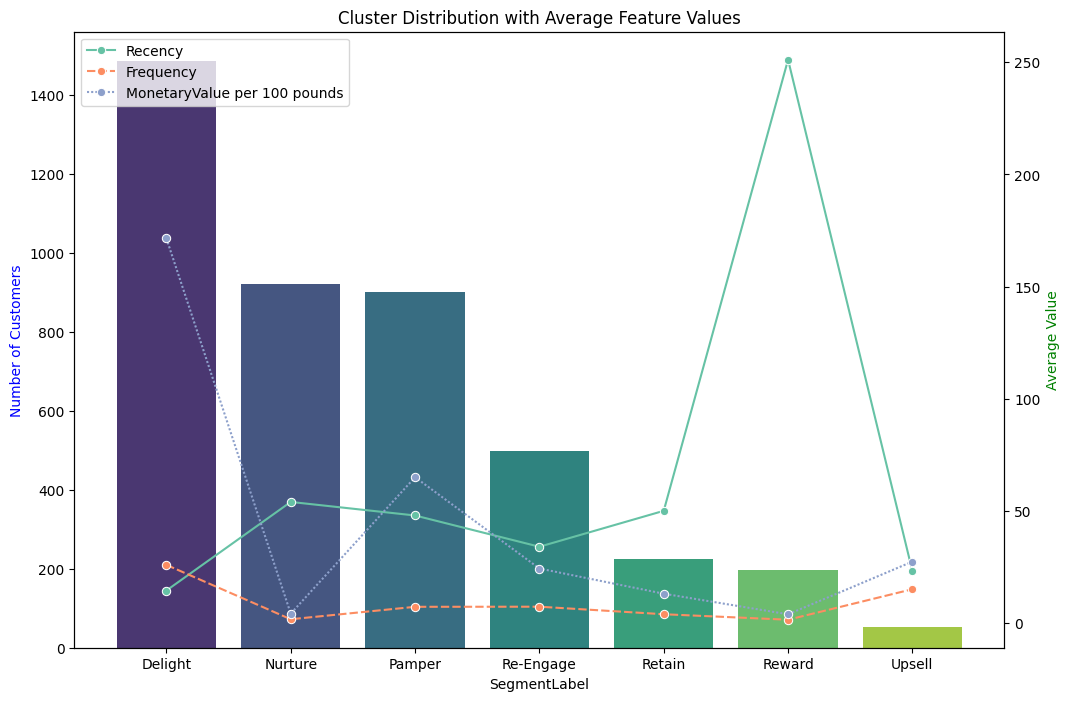

In [19]:
cluster_counts = full_clustering_df['SegmentLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["TotalSpent"] / 100.00
feature_means = full_clustering_df.groupby('SegmentLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()